In [1]:
import os

import sys
import json
import matplotlib.pyplot as plt
import numpy; np = numpy

import datetime

from sklearn.neural_network import MLPClassifier

In [2]:
HOME_DIR = os.path.abspath(".") + "/"
TRAIN_DIR = HOME_DIR + 'train_images'
VALIDATION_DIR = HOME_DIR + 'validation_images'
TEST_DIR = HOME_DIR + 'test_images'
TRAIN_LABELS = HOME_DIR + 'train_labels.csv'
VALIDATION_LABELS = HOME_DIR + 'validation_labels.csv'
TEST_LABELS = HOME_DIR + 'test_labels.csv'
EXTENSION = '.png'

In [3]:
# Load training images and labels
os.chdir(TRAIN_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of training images:', len(images))
x_train = np.array(images)
print('x_train shape:', x_train.shape)
y_train_labels = np.genfromtxt(TRAIN_LABELS, delimiter=',')
print('Number of training labels equals number of training images:', len(y_train_labels) == x_train.shape[0])

Number of training images: 740
x_train shape: (740, 600, 780, 3)
Number of training labels equals number of training images: True


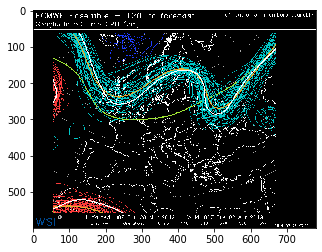

In [4]:
plt.imshow(x_train[0, :, :, :])

mean color value=0.06686550378799438
histgram of pixels are [0.92733547 0.00242521 0.         0.         0.         0.
 0.00836325 0.         0.         0.06187607]
mean color value=0.1038186252117157
histgram of pixels are [8.68408120e-01 0.00000000e+00 1.52820513e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.01175214e-02 5.81025641e-02
 6.41025641e-05 4.80256410e-02]
mean color value=0.10100289434194565
histgram of pixels are [0.86834402 0.00846368 0.01196795 0.         0.         0.00088889
 0.00500855 0.05816667 0.         0.04716026]


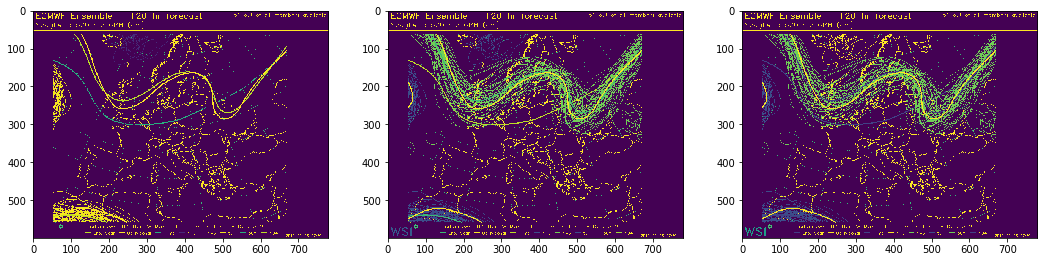

In [5]:
# We need think about how to create some proper "structured features"
def feature_array_from_band(band, output=False):
    avg = numpy.mean(band)
    if output: 
        print(f"mean color value={avg}")
    hist = numpy.histogram(numpy.ravel(band))[0] / band.shape[0] / band.shape[1]
    if output:
        print(f"histgram of pixels are {hist}")
    return [avg] + list(hist)
    
plt.figure(figsize=(18,20))
img_features = []
for i in range(3):
    image0 = x_train[0, :, :, i]
    plt.subplot(int(f"13{i + 1}"))
    plt.imshow(image0)
    img_features += feature_array_from_band(image0, output=True)

In [6]:
def dataset_to_feature_array(dataset):
    p = numpy.zeros((dataset.shape[0], 33))
    for i in range(dataset.shape[0]):
        for b in range(3):
            p[i, b * 11:(b + 1) * 11] = numpy.array(feature_array_from_band(dataset[i, :, :, b]))
    return p

In [7]:
# Reload training images and labels
os.chdir(TRAIN_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of training images:', len(images))
x_train = dataset_to_feature_array(np.array(images))
print('x_train shape:', x_train.shape)
y_train_labels = np.genfromtxt(TRAIN_LABELS, delimiter=',')
print('Number of training labels equals number of training images:', len(y_train_labels) == x_train.shape[0])

Number of training images: 740
x_train shape: (740, 33)
Number of training labels equals number of training images: True


In [8]:
# Load validation images and labels
os.chdir(VALIDATION_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of validation images:', len(images))
x_validation = dataset_to_feature_array(np.array(images))
print('x_validation shape:', x_validation.shape)
y_validation_labels = np.genfromtxt(VALIDATION_LABELS, delimiter=',')
print('Number of validation labels equals number of validation images:', len(y_validation_labels) == x_validation.shape[0])

Number of validation images: 170
x_validation shape: (170, 33)
Number of validation labels equals number of validation images: True


In [13]:
# Load test images and labels
os.chdir(TEST_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of test images:', len(images))
x_test = dataset_to_feature_array(np.array(images))
print('x_test shape:', x_test.shape)
y_test_labels = np.genfromtxt(TEST_LABELS, delimiter=',')
print('Number of test labels equals number of test images:', len(y_test_labels) == x_test.shape[0])

Number of test images: 170
x_test shape: (170, 33)
Number of test labels equals number of test images: True


In [10]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1, activation='relu', batch_size=32, verbose=True, max_iter=1000)

In [11]:
clf.fit(x_train, y_train_labels)

Iteration 1, loss = 0.96136452
Iteration 2, loss = 0.81940994
Iteration 3, loss = 0.68956951
Iteration 4, loss = 0.58117914
Iteration 5, loss = 0.49522434
Iteration 6, loss = 0.42628582
Iteration 7, loss = 0.37267596
Iteration 8, loss = 0.32994017
Iteration 9, loss = 0.29739418
Iteration 10, loss = 0.27258164
Iteration 11, loss = 0.25389627
Iteration 12, loss = 0.23951630
Iteration 13, loss = 0.22807617
Iteration 14, loss = 0.21937839
Iteration 15, loss = 0.21225535
Iteration 16, loss = 0.20692179
Iteration 17, loss = 0.20233450
Iteration 18, loss = 0.19876160
Iteration 19, loss = 0.19562221
Iteration 20, loss = 0.19286632
Iteration 21, loss = 0.19043752
Iteration 22, loss = 0.18801162
Iteration 23, loss = 0.18589075
Iteration 24, loss = 0.18387840
Iteration 25, loss = 0.18190272
Iteration 26, loss = 0.18009994
Iteration 27, loss = 0.17833362
Iteration 28, loss = 0.17663980
Iteration 29, loss = 0.17499923
Iteration 30, loss = 0.17338813
Iteration 31, loss = 0.17179637
Iteration 32, los

Iteration 262, loss = 0.08244004
Iteration 263, loss = 0.08238359
Iteration 264, loss = 0.08226854
Iteration 265, loss = 0.08177571
Iteration 266, loss = 0.08180127
Iteration 267, loss = 0.08192064
Iteration 268, loss = 0.08160920
Iteration 269, loss = 0.08136254
Iteration 270, loss = 0.08126292
Iteration 271, loss = 0.08170953
Iteration 272, loss = 0.08096726
Iteration 273, loss = 0.08076502
Iteration 274, loss = 0.08052134
Iteration 275, loss = 0.08029941
Iteration 276, loss = 0.08027891
Iteration 277, loss = 0.08005568
Iteration 278, loss = 0.07984471
Iteration 279, loss = 0.08000910
Iteration 280, loss = 0.07935796
Iteration 281, loss = 0.07926305
Iteration 282, loss = 0.07932352
Iteration 283, loss = 0.07906570
Iteration 284, loss = 0.07883851
Iteration 285, loss = 0.07871456
Iteration 286, loss = 0.07845727
Iteration 287, loss = 0.07837942
Iteration 288, loss = 0.07819471
Iteration 289, loss = 0.07788753
Iteration 290, loss = 0.07775866
Iteration 291, loss = 0.07783685
Iteration 

Iteration 522, loss = 0.05115520
Iteration 523, loss = 0.05075906
Iteration 524, loss = 0.05091803
Iteration 525, loss = 0.05117736
Iteration 526, loss = 0.05067466
Iteration 527, loss = 0.05061943
Iteration 528, loss = 0.05043971
Iteration 529, loss = 0.05104065
Iteration 530, loss = 0.05154655
Iteration 531, loss = 0.05072101
Iteration 532, loss = 0.05022229
Iteration 533, loss = 0.05010862
Iteration 534, loss = 0.05029126
Iteration 535, loss = 0.05018032
Iteration 536, loss = 0.04985944
Iteration 537, loss = 0.04987702
Iteration 538, loss = 0.04997935
Iteration 539, loss = 0.04990716
Iteration 540, loss = 0.04960507
Iteration 541, loss = 0.04995284
Iteration 542, loss = 0.04965483
Iteration 543, loss = 0.04953643
Iteration 544, loss = 0.04982609
Iteration 545, loss = 0.04935436
Iteration 546, loss = 0.04938681
Iteration 547, loss = 0.04912813
Iteration 548, loss = 0.04914732
Iteration 549, loss = 0.05034169
Iteration 550, loss = 0.04899743
Iteration 551, loss = 0.04910168
Iteration 

Iteration 792, loss = 0.03652075
Iteration 793, loss = 0.03646171
Iteration 794, loss = 0.03643435
Iteration 795, loss = 0.03674211
Iteration 796, loss = 0.03687515
Iteration 797, loss = 0.03597059
Iteration 798, loss = 0.03643634
Iteration 799, loss = 0.03606977
Iteration 800, loss = 0.03598803
Iteration 801, loss = 0.03623497
Iteration 802, loss = 0.03644557
Iteration 803, loss = 0.03609288
Iteration 804, loss = 0.03585730
Iteration 805, loss = 0.03582797
Iteration 806, loss = 0.03570217
Iteration 807, loss = 0.03649465
Iteration 808, loss = 0.03597109
Iteration 809, loss = 0.03657750
Iteration 810, loss = 0.03566196
Iteration 811, loss = 0.03564130
Iteration 812, loss = 0.03575316
Iteration 813, loss = 0.03590247
Iteration 814, loss = 0.03576257
Iteration 815, loss = 0.03584256
Iteration 816, loss = 0.03564838
Iteration 817, loss = 0.03525665
Iteration 818, loss = 0.03569422
Iteration 819, loss = 0.03521405
Iteration 820, loss = 0.03537974
Iteration 821, loss = 0.03531947
Iteration 

MLPClassifier(activation='relu', alpha=1e-05, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [14]:
result = clf.predict(x_test) 
print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [15]:
print(f"Score = {(result == y_test_labels).sum() / len(result) * 100:.2f}%")

Score = 98.82%


In [16]:
# Let us see what was incorrctly predicted
numpy.argwhere(result != y_test_labels)

array([[117],
       [146]])

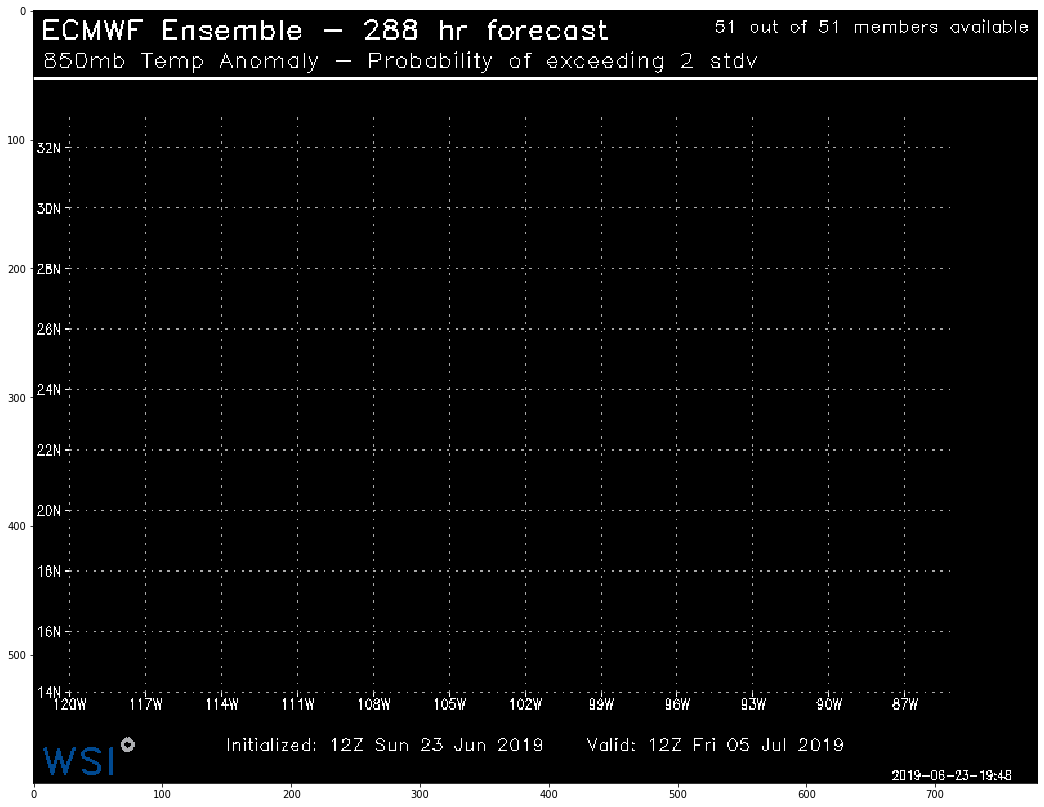

In [34]:
os.chdir(TEST_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
plt.figure(figsize=(18,20))
plt.imshow(images[146])